In [15]:
import pandas as pd
import numpy as np

In [16]:
%store -r cpi_df

In [17]:
cpi_df

,Date,CPI
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700
...,...,...
1296,2021-01-01,261.582
1297,2021-02-01,263.014
1298,2021-03-01,264.877
1299,2021-04-01,267.054


In [18]:
# Cutting CPI df down to dates where BTC/SP info exists
cpi_2013_df = cpi_df[cpi_df['Date'] > '2013-01-01']

In [19]:
# Creating column to calculate monthly % change in CPI
cpi_2013_df['Mo Change'] = cpi_df['CPI'].pct_change()

<ipython-input-19-7db210617c43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_2013_df['Mo Change'] = cpi_df['CPI'].pct_change()


<AxesSubplot:xlabel='Date'>

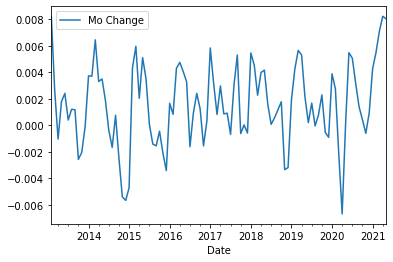

In [20]:
# Plotting line graph of CPI monthly change
cpi_2013_df.plot(x = 'Date', y = 'Mo Change')

<AxesSubplot:xlabel='Date'>

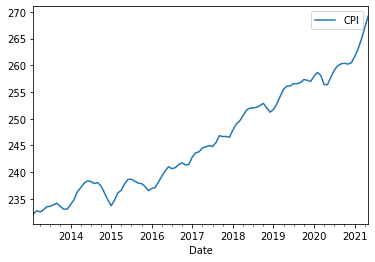

In [21]:
# Plotting line graph of CPI
cpi_2013_df.plot(x = 'Date', y = 'CPI')

In [22]:
%store -r btc_df
%store -r gold_usd_df
%store -r sp500_df

In [23]:
# Merging in BTC data
cpi_2013_df = pd.merge(cpi_2013_df, btc_df, how = 'left', on = 'Date')

In [24]:
# Merging in Gold data
cpi_2013_df = pd.merge(cpi_2013_df, gold_usd_df, how = 'left', on = 'Date')

In [25]:
# Merging in S&P 500 data
cpi_2013_df = pd.merge(cpi_2013_df, sp500_df, how = 'left', on = 'Date')

In [26]:
# Creating column to calculate monthly % change in BTC
cpi_2013_df['BTC Mo Change'] = cpi_2013_df['BTC/USD'].pct_change()

In [27]:
# Creating column to calculate monthly % change in Gold
cpi_2013_df['Gold Mo Change'] = cpi_2013_df['Oz Gold/USD'].pct_change()

In [28]:
# Creating column to calculate monthly % change in S&P 500
cpi_2013_df['SP 500 Mo Change'] = cpi_2013_df['SP500'].pct_change()

array([[<AxesSubplot:title={'center':'Mo Change'}>]], dtype=object)

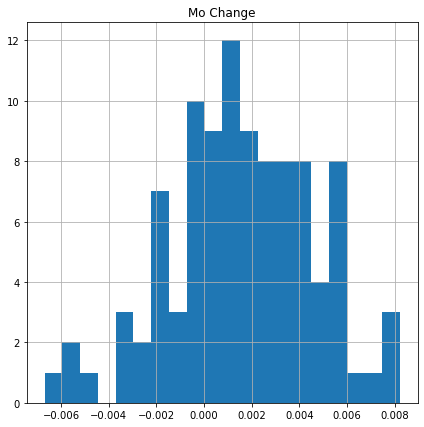

In [68]:
# Creating histogram of CPI monthly change
cpi_2013_df.hist(column = 'Mo Change', figsize = (7,7), bins = 20)

In [30]:
# Finding standard dev of CPI monthly change
cpi_2013_mo_std = cpi_2013_df['Mo Change'].std()

In [31]:
# Finding mean of CPI monthly change
cpi_2013_mo_mean = cpi_2013_df['Mo Change'].mean()

In [39]:
# Creating variable to categorize high change in monthly CPI change (1 standard dev above mean)
cpi_mo_high = cpi_2013_mo_mean + cpi_2013_mo_std

In [40]:
# Creating variable to categorize low change in monthly CPI change (1 standard dev below mean)
cpi_mo_low = cpi_2013_mo_mean - cpi_2013_mo_std

In [41]:
def cpi_cat(cpi_change):
    """
    This function categorizes monthly CPI changes.
    A 'High' monthly change is any change 1 standard deviations above the mean.
    A 'Low' monthly change is any change 1 standard deviations below the mean.
    Anything else is 'Normal'
    
    Inputs:
    Monthly CPI change
    
    Outputs:
    Categorical variables to describe monthly change in CPI ('High', 'Normal', and 'Low')
    """
    if cpi_change > cpi_mo_high:
        return 'High'
    elif cpi_change < cpi_mo_low:
        return 'Low'
    else:
        return 'Normal'

In [42]:
# Creating categorical columns to describe monthly CPI change
cpi_2013_df['CPI Change Cat'] = cpi_2013_df['Mo Change'].apply(cpi_cat)

In [84]:
# Finding count of each categorical column for monthly CPI change
cpi_2013_df.groupby('CPI Change Cat').count().drop(columns = ['CPI','BTC/USD','Oz Gold/USD', 'SP500'])

,Date,Mo Change,BTC Mo Change,Gold Mo Change,SP 500 Mo Change
CPI Change Cat,,,,,
High,16,16,15,15,15
Low,16,16,16,16,16
Normal,68,68,65,68,68


In [44]:
cpi_2013_df

,Date,CPI,Mo Change,BTC/USD,Oz Gold/USD,SP500,BTC Mo Change,Gold Mo Change,SP 500 Mo Change,CPI Change Cat
0,2013-02-01,232.166,0.008190,NaN,1669.0,1513.17,NaN,NaN,NaN,High
1,2013-03-01,232.773,0.002615,NaN,1582.3,1518.20,NaN,-0.051947,0.003324,Normal
2,2013-04-01,232.531,-0.001040,NaN,1598.3,1562.17,NaN,0.010112,0.028962,Normal
3,2013-05-01,232.945,0.001780,116.989998,1454.8,1582.70,NaN,-0.089783,0.013142,Normal
4,2013-06-01,233.504,0.002400,129.300003,NaN,NaN,0.105223,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...
95,2021-01-01,261.582,0.004254,29374.151889,NaN,NaN,0.562206,0.000000,0.000000,Normal
96,2021-02-01,263.014,0.005474,33537.176820,NaN,3773.86,0.141724,0.000000,0.030420,High
97,2021-03-01,264.877,0.007083,49631.241371,NaN,3901.82,0.479887,0.000000,0.033907,High
98,2021-04-01,267.054,0.008219,59095.807978,NaN,4019.87,0.190698,0.000000,0.030255,High


In [69]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

<AxesSubplot:title={'center':'Gold Mo Change'}, xlabel='CPI Change Cat'>

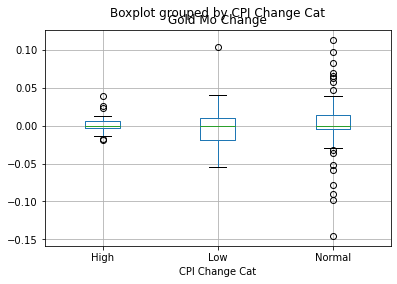

In [46]:
# Creating boxplot of monthly change in gold based on CPI Change Cat column
cpi_2013_df.boxplot(column = 'Gold Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

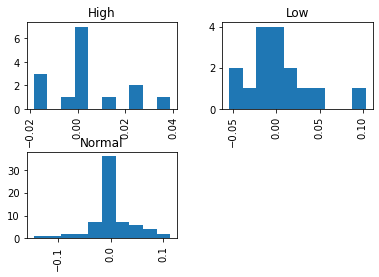

In [47]:
# Creating histograms of monthly change in gold based on CPI Change Cat column
cpi_2013_df.hist(column = 'Gold Mo Change', by = 'CPI Change Cat')

In [55]:
# Creating series for different sets of monthly change in gold price based on CPI Change Cat
high_cpi_mo_gold_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'High']['Gold Mo Change'].dropna()
normal_cpi_mo_gold_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Normal']['Gold Mo Change'].dropna()
low_cpi_mo_gold_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Low']['Gold Mo Change'].dropna()

In [70]:
# Man Whit U hypothesis test for gold monthly change with high and normal cpi change datasets
mannwhitneyu(high_cpi_mo_gold_change, normal_cpi_mo_gold_change)

MannwhitneyuResult(statistic=506.5, pvalue=0.4854929254963858)

In [71]:
# Man Whit U hypothesis test for gold monthly change with high and low cpi change datasets
mannwhitneyu(high_cpi_mo_gold_change, low_cpi_mo_gold_change)

MannwhitneyuResult(statistic=101.0, pvalue=0.22721355472849947)

In [72]:
# Man Whit U hypothesis test for gold monthly change with low and normal cpi change datasets
mannwhitneyu(normal_cpi_mo_gold_change, low_cpi_mo_gold_change)

MannwhitneyuResult(statistic=488.0, pvalue=0.26012491973270596)

<AxesSubplot:title={'center':'BTC Mo Change'}, xlabel='CPI Change Cat'>

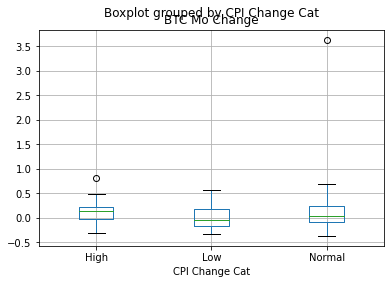

In [52]:
# Creating boxplot of monthly change in BTC based on CPI Change Cat column
cpi_2013_df.boxplot(column = 'BTC Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

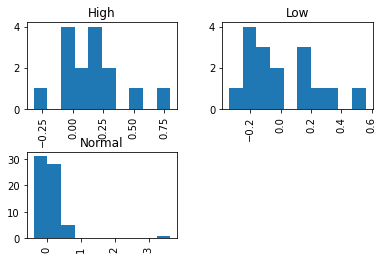

In [53]:
# Creating histogram of monthly change in BTC based on CPI Change Cat column
cpi_2013_df.hist(column = 'BTC Mo Change', by = 'CPI Change Cat')

In [56]:
# Creating series for different sets of monthly change in BTC price based on CPI Change Cat
high_cpi_mo_btc_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'High']['BTC Mo Change'].dropna()
normal_cpi_mo_btc_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Normal']['BTC Mo Change'].dropna()
low_cpi_mo_btc_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Low']['BTC Mo Change'].dropna()

In [73]:
# Man Whit U hypothesis test for BTC monthly change with high and normal cpi change datasets
mannwhitneyu(high_cpi_mo_btc_change, normal_cpi_mo_btc_change)

MannwhitneyuResult(statistic=424.0, pvalue=0.2187032214511797)

In [74]:
# Man Whit U hypothesis test for BTC monthly change with low and high cpi change datasets
mannwhitneyu(high_cpi_mo_btc_change, low_cpi_mo_btc_change)

MannwhitneyuResult(statistic=82.0, pvalue=0.06912789663878395)

In [75]:
# Man Whit U hypothesis test for BTC monthly change with low and normal cpi change datasets
mannwhitneyu(normal_cpi_mo_btc_change, low_cpi_mo_btc_change)

MannwhitneyuResult(statistic=412.0, pvalue=0.1011206918422144)

<AxesSubplot:title={'center':'SP 500 Mo Change'}, xlabel='CPI Change Cat'>

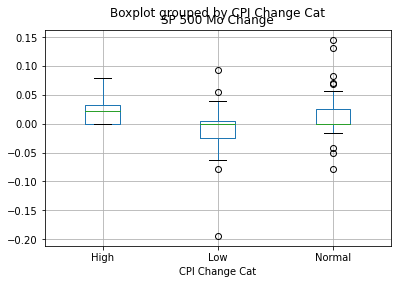

In [60]:
# Creating boxplot of monthly change in S&P 500 based on CPI Change Cat column
cpi_2013_df.boxplot(column = 'SP 500 Mo Change', by = 'CPI Change Cat')

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Normal'}>, <AxesSubplot:>]],
      dtype=object)

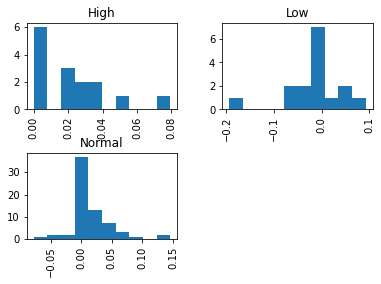

In [61]:
# Creating histograms of monthly change in S&P 500 based on CPI Change Cat column
cpi_2013_df.hist(column = 'SP 500 Mo Change', by = 'CPI Change Cat')

In [62]:
# Creating series for different sets of monthly change in S&P 500 price based on CPI Change Cat
high_cpi_mo_sp_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'High']['SP 500 Mo Change'].dropna()
normal_cpi_mo_sp_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Normal']['SP 500 Mo Change'].dropna()
low_cpi_mo_sp_change = cpi_2013_df[cpi_2013_df['CPI Change Cat'] == 'Low']['SP 500 Mo Change'].dropna()

In [76]:
# Man Whit U hypothesis test for S&P 500 monthly change with high and normal cpi change datasets
mannwhitneyu(high_cpi_mo_sp_change, normal_cpi_mo_sp_change)

MannwhitneyuResult(statistic=373.5, pvalue=0.04869364572070888)

In [77]:
# Man Whit U hypothesis test for S&P 500 monthly change with low and high cpi change datasets
mannwhitneyu(high_cpi_mo_sp_change, low_cpi_mo_sp_change)

MannwhitneyuResult(statistic=66.5, pvalue=0.016554888338083714)

In [78]:
# Man Whit U hypothesis test for S&P 500 monthly change with low and normal cpi change datasets
mannwhitneyu(normal_cpi_mo_sp_change, low_cpi_mo_sp_change)

MannwhitneyuResult(statistic=395.5, pvalue=0.04141709338500382)

In [79]:
# Creating dictionary with various p-values from above analysis of Gold, BTC and S&P 500 monthly changes
mw_u_cpi_2013 = {'Gold pvalues':[0.48549, 0.22721, 0.26012], 'BTC pvalues':[0.21870, 0.06913, 0.10112], \
                 'SP500 pvalues':[0.04869, 0.01655, 0.04142]}

In [81]:
mw_u_cpi_2013_df = pd.DataFrame.from_dict(mw_u_cpi_2013, orient='index', columns = ['High/Normal', 'High/Low', 'Normal/Low'])

In [85]:
mw_u_cpi_2013_df

,High/Normal,High/Low,Normal/Low
Gold pvalues,0.48549,0.22721,0.26012
BTC pvalues,0.21870,0.06913,0.10112
SP500 pvalues,0.04869,0.01655,0.04142


<AxesSubplot:title={'center':'P-Values for Gold, and S&P 500 Monthly Changes for various CPI Change Cats'}>

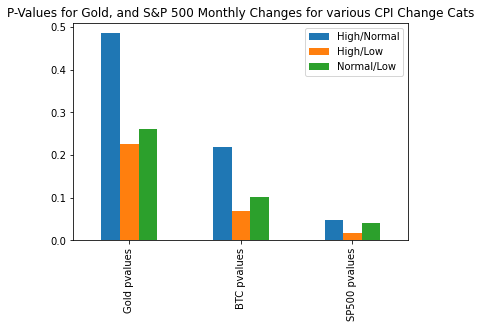

In [82]:
# Creating bar chart for various p-values from above analysis of Gold, BTC and S&P 500 monthly changes
mw_u_cpi_2013_df.plot.bar(title = 'P-Values for Gold, and S&P 500 Monthly Changes for various CPI Change Cats')

In [83]:
# Finding mean of columns grouping by CPI Change Cat column
cpi_2013_df.groupby('CPI Change Cat').agg('mean').drop(columns = ['CPI','BTC/USD','Oz Gold/USD', 'SP500'])

,Mo Change,BTC Mo Change,Gold Mo Change,SP 500 Mo Change
CPI Change Cat,,,,
High,0.006078,0.141161,0.003030,0.021580
Low,-0.003140,0.009219,-0.000175,-0.012174
Normal,0.001613,0.133613,0.002327,0.013701
